In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

In [2]:
# Titanic dataset from seaborn
titanic_df = sns.load_dataset('titanic')

# Explore the dataset

print(f"titanic_df.head()\n{titanic_df.head()}")
print(f"titanic_df.shape\n{titanic_df.shape}")
print(f"titanic_df.dtypes\n{titanic_df.dtypes}")
print(f"titanic_df.isnull().sum()\n{titanic_df.isnull().sum()}")
print(f"titanic_df.duplicated().sum()\n{titanic_df.duplicated().sum()}")
print(f"print(df.describe().T\n{titanic_df.describe().T}")

titanic_df.head()
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
titanic_df.shape
(891, 15)
titanic_df.dtypes
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare        

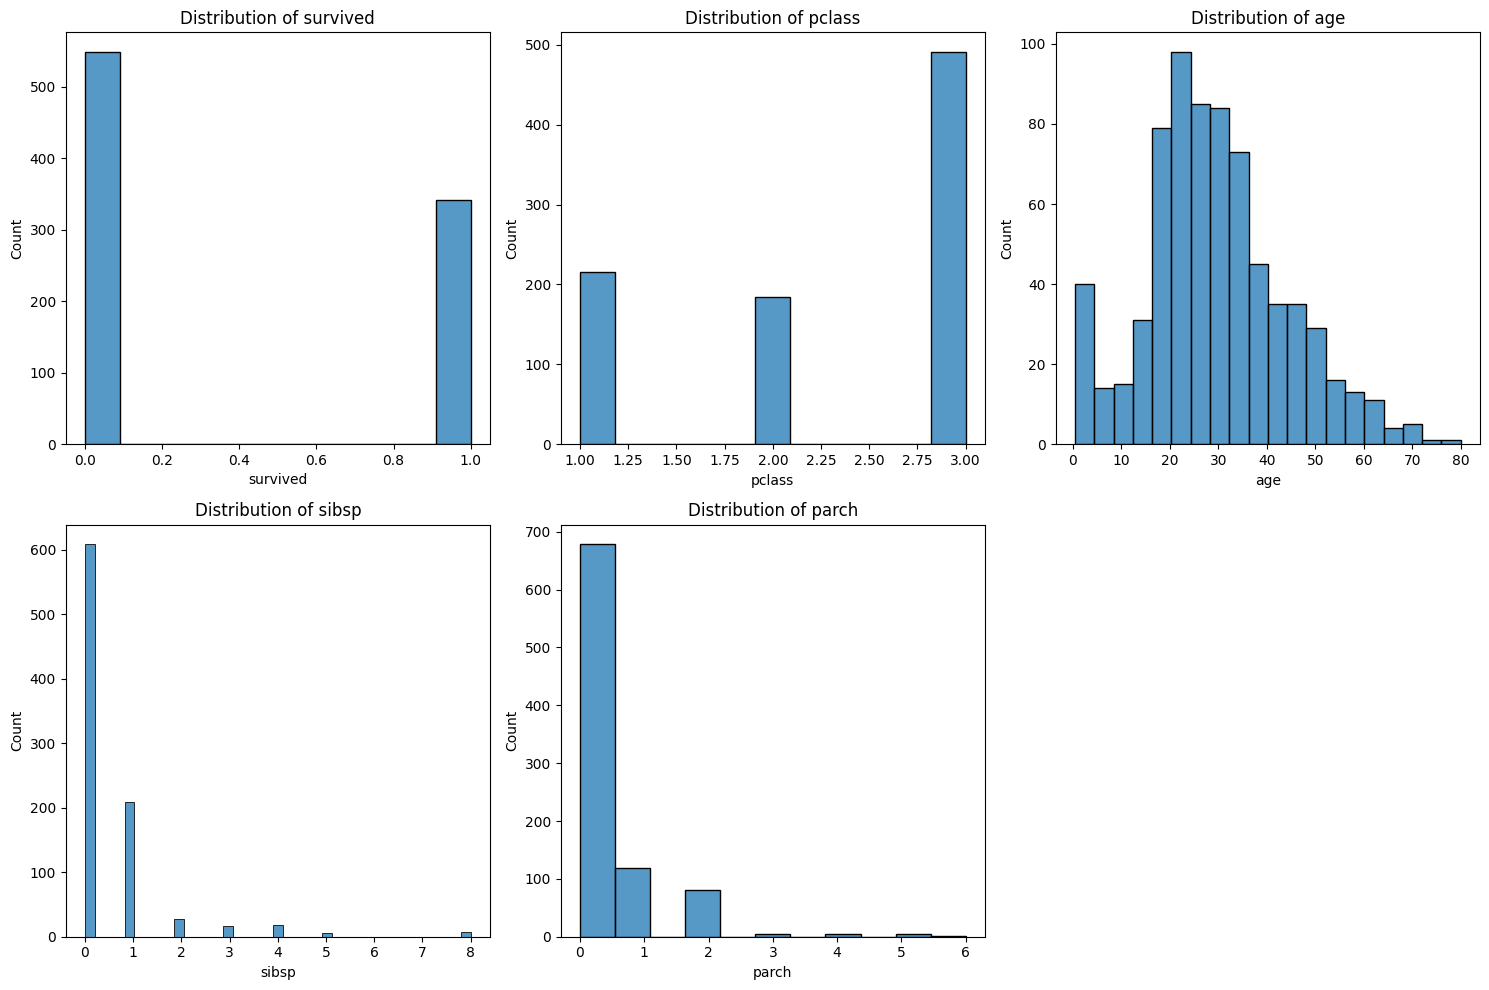

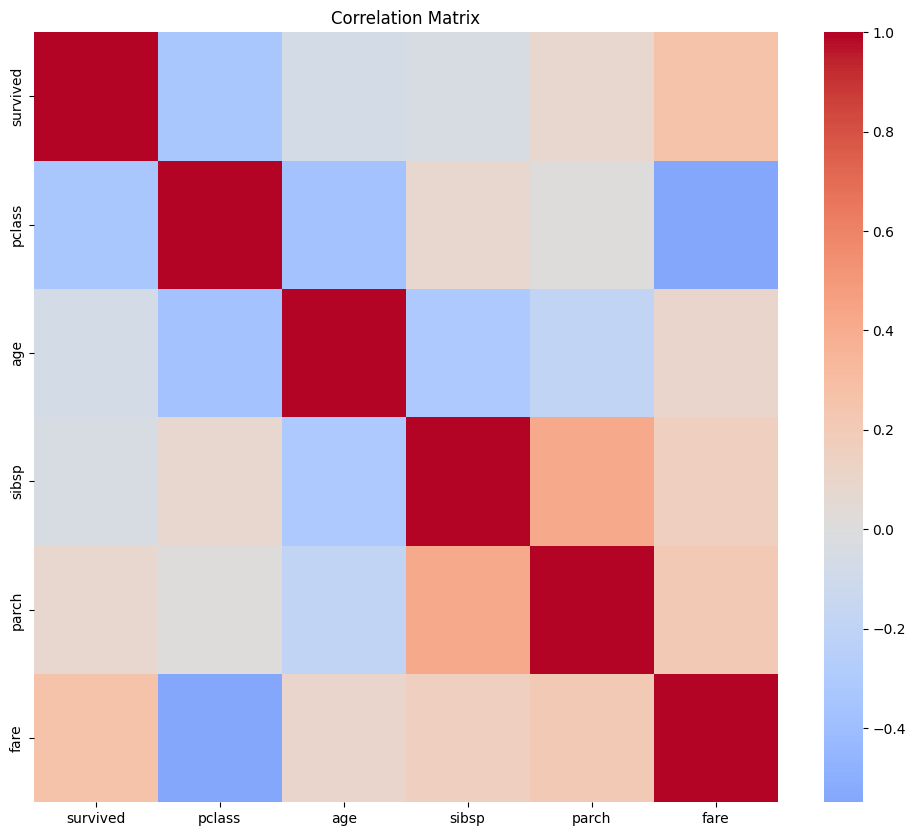

In [3]:
# Visualization of numerical variables

plt.figure(figsize=(15, 10))
numeric_cols = titanic_df.select_dtypes(include=['float64', 'int64']).columns[:5]  # First 5 numeric columns
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(titanic_df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
if len(numeric_df.columns) > 10:
    numeric_df = numeric_df.iloc[:, :10]  # First 10 numeric columns if there are too many
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

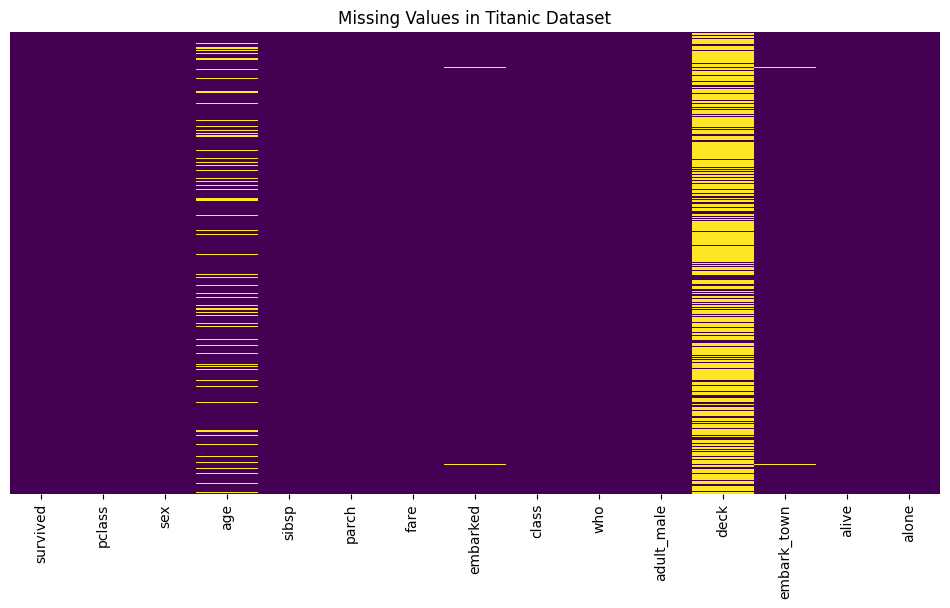

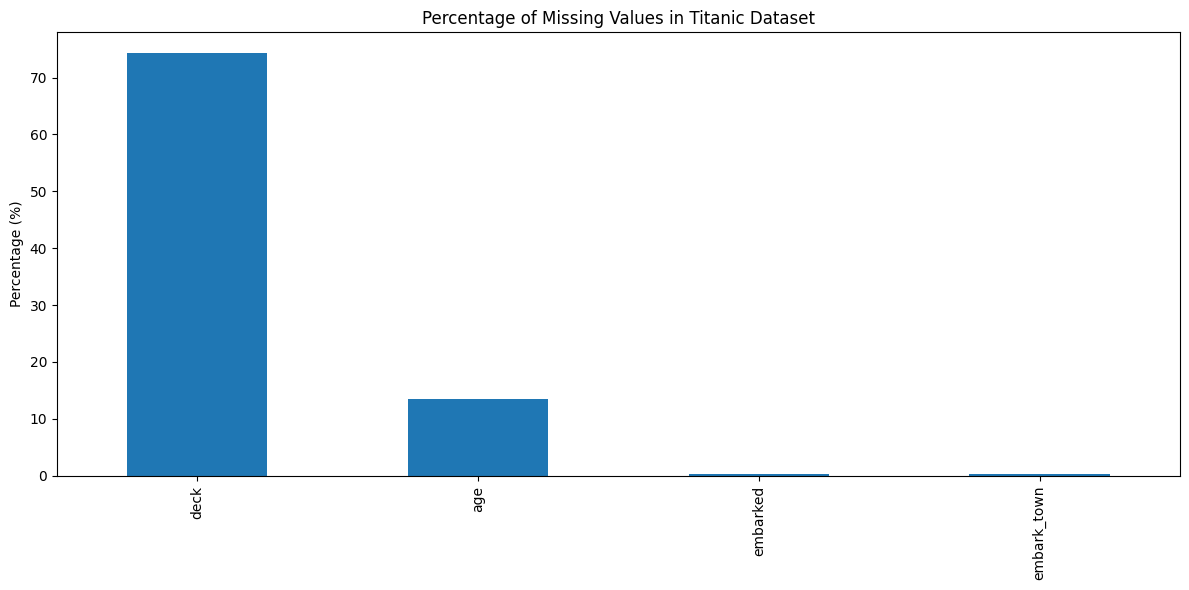

The data type of the column 'deck' is: category
The data type of the column 'age' is: float64
The data type of the column 'embarked' is: object
The data type of the column 'embark_town' is: object


In [4]:
# Data cleansing

# Drop duplicate rows
titanic_df = titanic_df.drop_duplicates()

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title(f'Missing Values in Titanic Dataset')
plt.show()

missing_percentage = (titanic_df.isnull().sum() / len(titanic_df) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title(f'Percentage of Missing Values in Titanic Dataset')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

for colname in missing_percentage.index:
    print(f"The data type of the column '{colname}' is: {titanic_df[colname].dtype}")

Missing values after imputation:
Series([], dtype: float64)


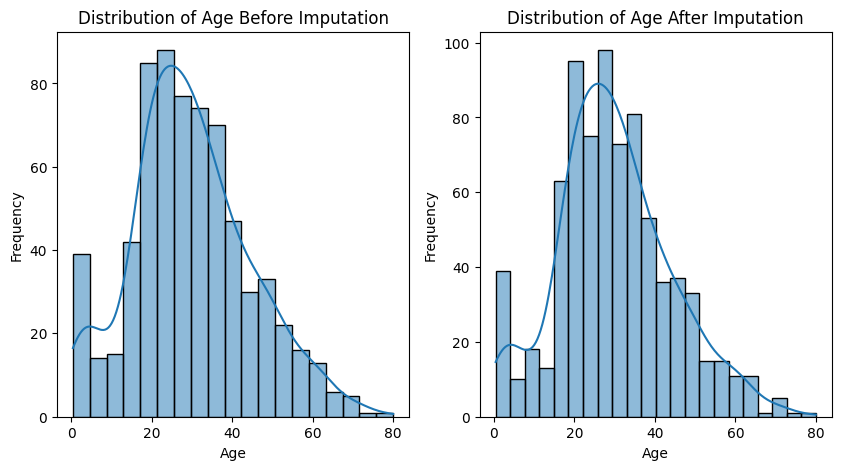

In [5]:
# Handle missing values
df_missing = titanic_df.copy()

# Drop columns with more then 50% missing values
threshold = 0.5
columns_to_drop = [col for col in df_missing.columns
                   if df_missing[col].isnull().mean() > threshold]
df_missing = df_missing.drop(columns=columns_to_drop)

# Use KNN imputation for numeric columns
df_missing_numeric = df_missing.select_dtypes(include=['float64', 'int64'])
numeric_cols = df_missing_numeric.columns
imputer_knn = KNNImputer(n_neighbors=5)
df_missing[numeric_cols] = imputer_knn.fit_transform(df_missing_numeric)

# Use SimpleImputer for categorical columns
df_missing_categorical = df_missing.select_dtypes(include=['object'])
categorical_cols = df_missing_categorical.columns
imputer = SimpleImputer(strategy='most_frequent')
df_missing[categorical_cols] = imputer.fit_transform(df_missing[categorical_cols])

# Check for missing values again
missing_percentage = (df_missing.isnull().sum() / len(df_missing) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"Missing values after imputation:\n{missing_percentage}")

plt.figure(figsize=(10, 5))
# Visualize 'age' before imputation
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['age'], kde=True)
plt.title('Distribution of Age Before Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Visualize 'age' after imputation
plt.subplot(1, 2, 2)
sns.histplot(df_missing['age'], kde=True)
plt.title('Distribution of Age After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


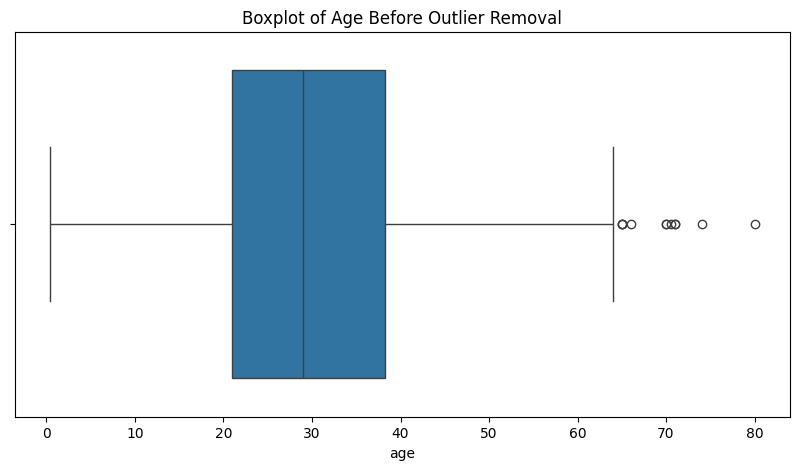

Number of outliers detected by IQR method: 11


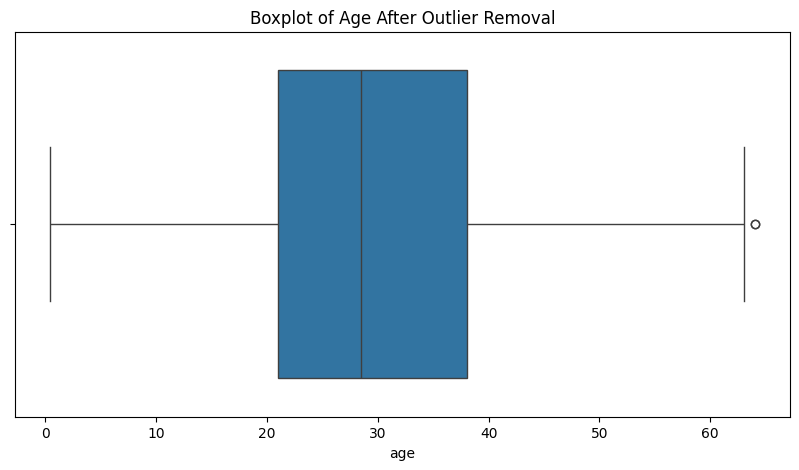

In [6]:
# Handle outliers with IQR method
column = 'age' #! no good choice available
# column = 'sibsp'

df_outlier = df_missing.copy()

# Boxplot before outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_outlier[column])
plt.title('Boxplot of Age Before Outlier Removal')
plt.show()

Q1 = df_outlier[column].quantile(0.25)
Q3 = df_outlier[column].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_outlier[column] < (Q1 - 1.5 * IQR)) |
                (df_outlier[column] > (Q3 + 1.5 * IQR)))
print(f"Number of outliers detected by IQR method: {np.sum(outliers_iqr)}")

# Remove outliers
df_outlier = df_outlier[~outliers_iqr]
# Boxplot after outlier removal
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_outlier[column])
plt.title('Boxplot of Age After Outlier Removal')
plt.show()